In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns





In [3]:
file_path = "Customer_Churn_Prediction.csv"
df = pd.read_csv(file_path)


In [4]:
label_encoders = {}
categorical_columns = ["Gender", "ContractType", "PaymentMethod", "InternetService"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

scaler = StandardScaler()
scaled_features = ["MonthlyCharges", "Tenure", "Age"]
df[scaled_features] = scaler.fit_transform(df[scaled_features])

X = df.drop(["CustomerID", "Churn"], axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

Accuracy: 0.635

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.94      0.77       127
           1       0.50      0.10      0.16        73

    accuracy                           0.64       200
   macro avg       0.57      0.52      0.46       200
weighted avg       0.59      0.64      0.55       200



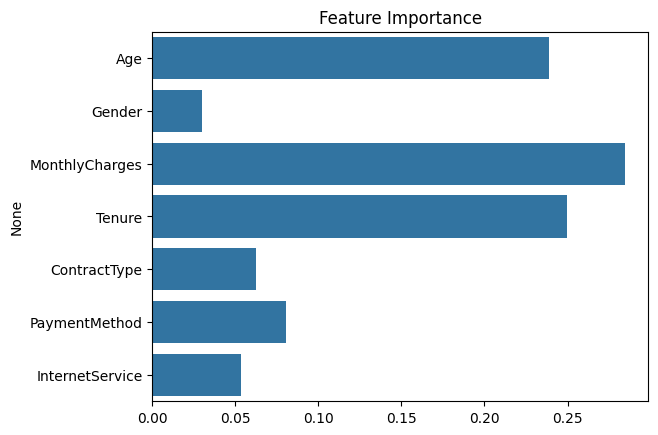

In [5]:
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

importances = model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()